In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals
import scipy.io as sio # For loading matlab files
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
plt.rcParams['figure.figsize'] = (32.0, 8.0)
headertr, versiontr, globstr, xtr, ytr= sio.loadmat('train_32x32.mat')
TrainSet = sio.loadmat('train_32x32.mat')
train_y = TrainSet["y"]
train_x = TrainSet["X"]
type(train_x)

numpy.ndarray

In [22]:
TestSet = sio.loadmat('test_32x32.mat')
test_x, test_y = TestSet["X"],TestSet["y"]
print("Train set X and y shapes are ", train_x.shape , train_y.shape)
print("Test set X and y shapes are ", test_x.shape , test_y.shape)

Train set X and y shapes are  (32, 32, 3, 73257) (73257, 1)
Test set X and y shapes are  (32, 32, 3, 26032) (26032, 1)


In [23]:
# Transpose x arrays
train_x, train_y = train_x.transpose((3,0,1,2)), train_y[:,0]
test_x, test_y = test_x.transpose((3,0,1,2)), test_y[:,0]

In [24]:
print("Train set X and y shapes are ", train_x.shape , train_y.shape)
print("Test set X and y shapes are ", test_x.shape , test_y.shape)

Train set X and y shapes are  (73257, 32, 32, 3) (73257,)
Test set X and y shapes are  (26032, 32, 32, 3) (26032,)


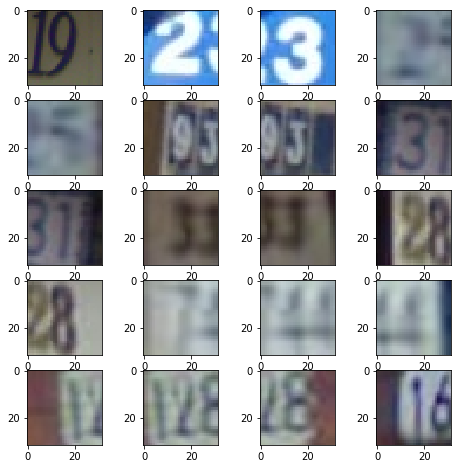

In [29]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = train_x[i,:,:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    
plt.show()

In [30]:
print(np.unique(train_y))

[ 1  2  3  4  5  6  7  8  9 10]


In [31]:
result = np.where(train_y==10)
result

(array([   52,    84,    93, ..., 73193, 73220, 73239], dtype=int64),)

In [32]:
train_y[train_y==10] = 0
test_y[test_y==10] = 0
train_y[52,]

0

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, 
                    validation_data=(test_x, test_y))

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 85s 1ms/sample - loss: 1.0233 - acc: 0.6879 - val_loss: 0.6541 - val_acc: 0.8241
Epoch 2/10
73257/73257 [==============================] - 84s 1ms/sample - loss: 0.5230 - acc: 0.8503 - val_loss: 0.5504 - val_acc: 0.8492
Epoch 3/10
73257/73257 [==============================] - 81s 1ms/sample - loss: 0.4405 - acc: 0.8725 - val_loss: 0.5158 - val_acc: 0.8591
Epoch 4/10
73257/73257 [==============================] - 82s 1ms/sample - loss: 0.3909 - acc: 0.8864 - val_loss: 0.4973 - val_acc: 0.8621
Epoch 5/10
73257/73257 [==============================] - 82s 1ms/sample - loss: 0.3624 - acc: 0.8939 - val_loss: 0.4778 - val_acc: 0.8745
Epoch 6/10
73257/73257 [==============================] - 85s 1ms/sample - loss: 0.3413 - acc: 0.9003 - val_loss: 0.4949 - val_acc: 0.8644
Epoch 7/10
73257/73257 [==============================] - 85s 1ms/sample - loss: 0.3169 - acc: 0.9062 - val_loss: 0.